# American Sign Language - Computer Vision Project

- Dataset: https://public.roboflow.com/object-detection/american-sign-language-letters
- Example Task: https://towardsdatascience.com/sign-language-recognition-with-advanced-computer-vision-7b74f20f3442

In [1]:
# OVERRIDE_TESTING = False # Set to True to run tests even if not in testing mode

In [2]:
import numpy as np
import tensorflow as tf

# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
tf.__version__

# from tensorflow.keras.preprocessing.image import load_img, img_to_array



'2.12.0'

In [3]:
# Custom functions:
%load_ext autoreload
%autoreload 2
# sys.path.append(os.path.abspath("../../"))
import ann_functions as af

In [4]:
# Checking the contents of data folder
data_dir = "./American Sign Language Letters.v1-v1.multiclass/"
data_dir

'./American Sign Language Letters.v1-v1.multiclass/'

In [5]:
# Getting list of img file paths (ONLY, did not make recursuve so no folders)
img_files = glob.glob(data_dir+"**/*")#, recursive=True)
len(img_files)

1731

In [6]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape

(416, 416, 3)

### 🎛️ Project Params

In [7]:
## Set project-wide parameters
# # Saving image params as vars for reuse
BATCH_SIZE = 32
IMG_HEIGHT = 128
IMG_WIDTH = 128
TRAIN_SPLIT = 0.7  # Proportion of data for training
VAL_SPLIT = 0.15  # Proportion of data for validation (remaining will be for test)

## Data

### Prepare CSV of Filenames + Labels

In [8]:

# Load the CSV file
csv_path = os.path.join(data_dir,"train","_classes.csv")
df = pd.read_csv(csv_path)

df = df.convert_dtypes()
# df['filename'] = df['filename']
df = df.set_index('filename')
df = df.astype(float)
df

A    B    C    D    E    F  \
filename                                                                        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
J30_jpg.rf.00d20e595026b31773ded47509545471.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
...                                              ...  ...  ...  ...  ...  ...   
A15_jpg.rf.ff648f0ba648df1d2782e75ddea0f9ba.jpg  1.0  0.0  0.0  0.0  0.0  0.0   
J3_jpg.rf.ff86dc5a870f1eadf471751c7fe11941.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
A19_jpg.rf.ffe6b49b3b0683ef4eb235ec6c7eca9e.jpg  1.0  0.0  0.0  0.0  0.0  0.0   
S17_jpg.rf.fff4096dcee5716f16ea8e65ee5ef85d.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
W20_jpg.rf.fffe2d54b2d00bbad942f6a406503d87.jpg  0.0  0.0  0.0  0.0  0.0  0.0   

                                                   G    H    I    J  ...    Q  \
filename                                                             ...        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  0.0  ...  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  ...  0.0   
K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg   0.0  0.0  0.0  0.0  ...  0.0   
W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg   0.0  0.0  0.0  0.0  ...  0.0   
J30_jpg.rf.00d20e595026b31773ded47509545471.jpg  0.0  0.0  0.0  1.0  ...  0.0   
...                                              ...  ...  ...  ...  ...  ...   
A15_jpg.rf.ff648f0ba648df1d2782e75ddea0f9ba.jpg  0.0  0.0  0.0  0.0  ...  0.0   
J3_jpg.rf.ff86dc5a870f1eadf471751c7fe11941.jpg   0.0  0.0  0.0  1.0  ...  0.0   
A19_jpg.rf.ffe6b49b3b0683ef4eb235ec6c7eca9e.jpg  0.0  0.0  0.0  0.0  ...  0.0   
S17_jpg.rf.fff4096dcee5716f16ea8e65ee5ef85d.jpg  0.0  0.0  0.0  0.0  ...  0.0   
W20_jpg.rf.fffe2d54b2d00bbad942f6a406503d87.jpg  0.0  0.0  0.0  0.0  ...  0.0   

                                                   R    S    T    U    V    W  \
filename                                                                        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  1.0  0.0  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg   0.0  0.0  0.0  0.0  0.0  1.0   
J30_jpg.rf.00d20e595026b31773ded47509545471.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
...                                              ...  ...  ...  ...  ...  ...   
A15_jpg.rf.ff648f0ba648df1d2782e75ddea0f9ba.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
J3_jpg.rf.ff86dc5a870f1eadf471751c7fe11941.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
A19_jpg.rf.ffe6b49b3b0683ef4eb235ec6c7eca9e.jpg  0.0  0.0  0.0  0.0  0.0  0.0   
S17_jpg.rf.fff4096dcee5716f16ea8e65ee5ef85d.jpg  0.0  1.0  0.0  0.0  0.0  0.0   
W20_jpg.rf.fffe2d54b2d00bbad942f6a406503d87.jpg  0.0  0.0  0.0  0.0  0.0  1.0   

                                                   X    Y    Z  
filename                                                        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  
K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg   0.0  0.0  0.0  
W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg   0.0  0.0  0.0  
J30_jpg.rf.00d20e595026b31773ded47509545471.jpg  0.0  0.0  0.0  
...                                              ...  ...  ...  
A15_jpg.rf.ff648f0ba648df1d2782e75ddea0f9ba.jpg  0.0  0.0  0.0  
J3_jpg.rf.ff86dc5a870f1eadf471751c7fe11941.jpg   0.0  0.0  0.0  
A19_jpg.rf.ffe6b49b3b0683ef4eb235ec6c7eca9e.jpg  0.0  0.0  0.0  
S17_jpg.rf.fff4096dcee5716f16ea8e65ee5ef85d.jpg  0.0  0.0  0.0  
W20_jpg.rf.fffe2d54b2d00bbad942f6a406503d87.jpg  0.0  0.0  0.0  

[1512 rows x 26 columns]

In [9]:
# Combine label columns into single column
df.loc[:,'label'] = df.apply(lambda x: x.idxmax(), axis=1)
display(df.head(2))
df['label'].value_counts(1).sort_index()

A    B    C    D    E    F  \
filename                                                                        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  0.0  0.0  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  0.0  0.0   

                                                   G    H    I    J  ...    R  \
filename                                                             ...        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  0.0  0.0  ...  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  ...  0.0   

                                                   S    T    U    V    W    X  \
filename                                                                        
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0  1.0  0.0  0.0  0.0   
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0  0.0  0.0  0.0  0.0   

                                                   Y    Z  label  
filename                                                          
U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg   0.0  0.0      U  
P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg  0.0  0.0      P  

[2 rows x 27 columns]

label
A    0.045635
B    0.025794
C    0.035714
D    0.041667
E    0.041667
F    0.039683
G    0.039683
H    0.033730
I    0.051587
J    0.051587
K    0.033730
L    0.047619
M    0.033730
N    0.039683
O    0.035714
P    0.033730
Q    0.039683
R    0.031746
S    0.045635
T    0.027778
U    0.031746
V    0.037698
W    0.037698
X    0.041667
Y    0.031746
Z    0.043651
Name: proportion, dtype: float64

In [10]:
n_examples = df.drop(columns=['filename', 'label'], errors='ignore').sum()
n_examples

A    69.0
B    39.0
C    54.0
D    63.0
E    63.0
F    60.0
G    60.0
H    51.0
I    78.0
J    78.0
K    51.0
L    72.0
M    51.0
N    60.0
O    54.0
P    51.0
Q    60.0
R    48.0
S    69.0
T    42.0
U    48.0
V    57.0
W    57.0
X    63.0
Y    48.0
Z    66.0
dtype: float64

In [11]:
label_cols = sorted(df.drop(columns=['filename','label'], errors='ignore').columns)
label_lookup = {i:label for i,label in enumerate(label_cols)}
label_lookup

{0: ' A',
 1: ' B',
 2: ' C',
 3: ' D',
 4: ' E',
 5: ' F',
 6: ' G',
 7: ' H',
 8: ' I',
 9: ' J',
 10: ' K',
 11: ' L',
 12: ' M',
 13: ' N',
 14: ' O',
 15: ' P',
 16: ' Q',
 17: ' R',
 18: ' S',
 19: ' T',
 20: ' U',
 21: ' V',
 22: ' W',
 23: ' X',
 24: ' Y',
 25: ' Z'}

In [12]:
## Get the filepaths and labels
df = df.reset_index(drop=False)

df['filepath'] = df.loc[:,'filename'].astype(str).map(lambda x: os.path.join(data_dir, "train/", x)).values
filepaths = df['filepath']

labels = df[label_cols].astype(float).values
filepaths[0], labels[0]

('./American Sign Language Letters.v1-v1.multiclass/train/U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [13]:
files_exist = np.array([os.path.exists(f) for f in filepaths])
files_exist.all()

True

In [14]:
# labels

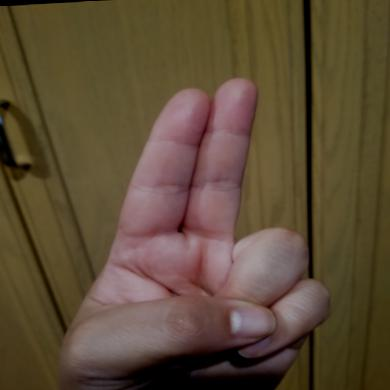

Letter:  U


In [15]:
display(load_img(filepaths[0]))
print(f"Letter: {label_lookup[np.argmax(labels[0])]}")

In [16]:

# # Create a TensorFlow dataset from the image paths and labels
# def load_image(image_path, label, img_height=128, img_width=128):
#     target_size=(img_height, img_width)
#     image = load_img(image_path, target_size=target_size)
#     image = img_to_array(image)
#     image = image / 255.0  # Normalize the image
#     return image, label


# Function to load and preprocess images
def load_image(filename, label, img_height=128, img_width=128):
    img = tf.io.read_file(filename)
    # img = tf.image.decode_image(img, channels=3)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])  # Explicitly set the shape
    img = tf.image.resize(img, [img_height, img_width])
    # img = img / 255.0  # Normalize the image
    return img, label


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

(128, 128, 3)


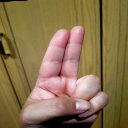

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]
Label:  U


In [17]:
ex_img, ex_label = load_image(filepaths[0], labels[0])
print(ex_img.shape)
display(array_to_img(ex_img))
print(f"Label: {ex_label}")
print(f"Label: {label_lookup[np.argmax(ex_label)]}")

### EDA

In [18]:
eda_df = df[['filepath', 'label']]
eda_df

filepath label
0     ./American Sign Language Letters.v1-v1.multicl...     U
1     ./American Sign Language Letters.v1-v1.multicl...     P
2     ./American Sign Language Letters.v1-v1.multicl...     K
3     ./American Sign Language Letters.v1-v1.multicl...     W
4     ./American Sign Language Letters.v1-v1.multicl...     J
...                                                 ...   ...
1507  ./American Sign Language Letters.v1-v1.multicl...     A
1508  ./American Sign Language Letters.v1-v1.multicl...     J
1509  ./American Sign Language Letters.v1-v1.multicl...     A
1510  ./American Sign Language Letters.v1-v1.multicl...     S
1511  ./American Sign Language Letters.v1-v1.multicl...     W

[1512 rows x 2 columns]

In [19]:
# ## Showing example of each letter
# label_lookup.values()

In [20]:
# labels = sorted(df['label'].unique())
# labels

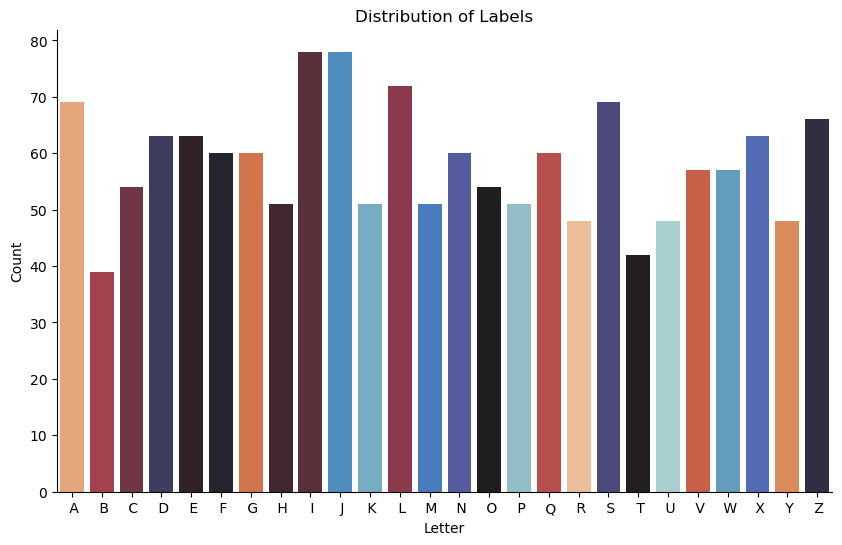

In [21]:
import seaborn as sns
# sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=eda_df, x='label',order=label_lookup.values(),
              hue='label', dodge=False,palette=sns.color_palette("icefire",n_colors=len(label_lookup)),
              ax=ax)
ax.set(title="Distribution of Labels", xlabel="Letter", ylabel="Count")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig("images/label_dist.png", dpi=300, bbox_inches='tight', transparent=False)

#### Display Example of Each

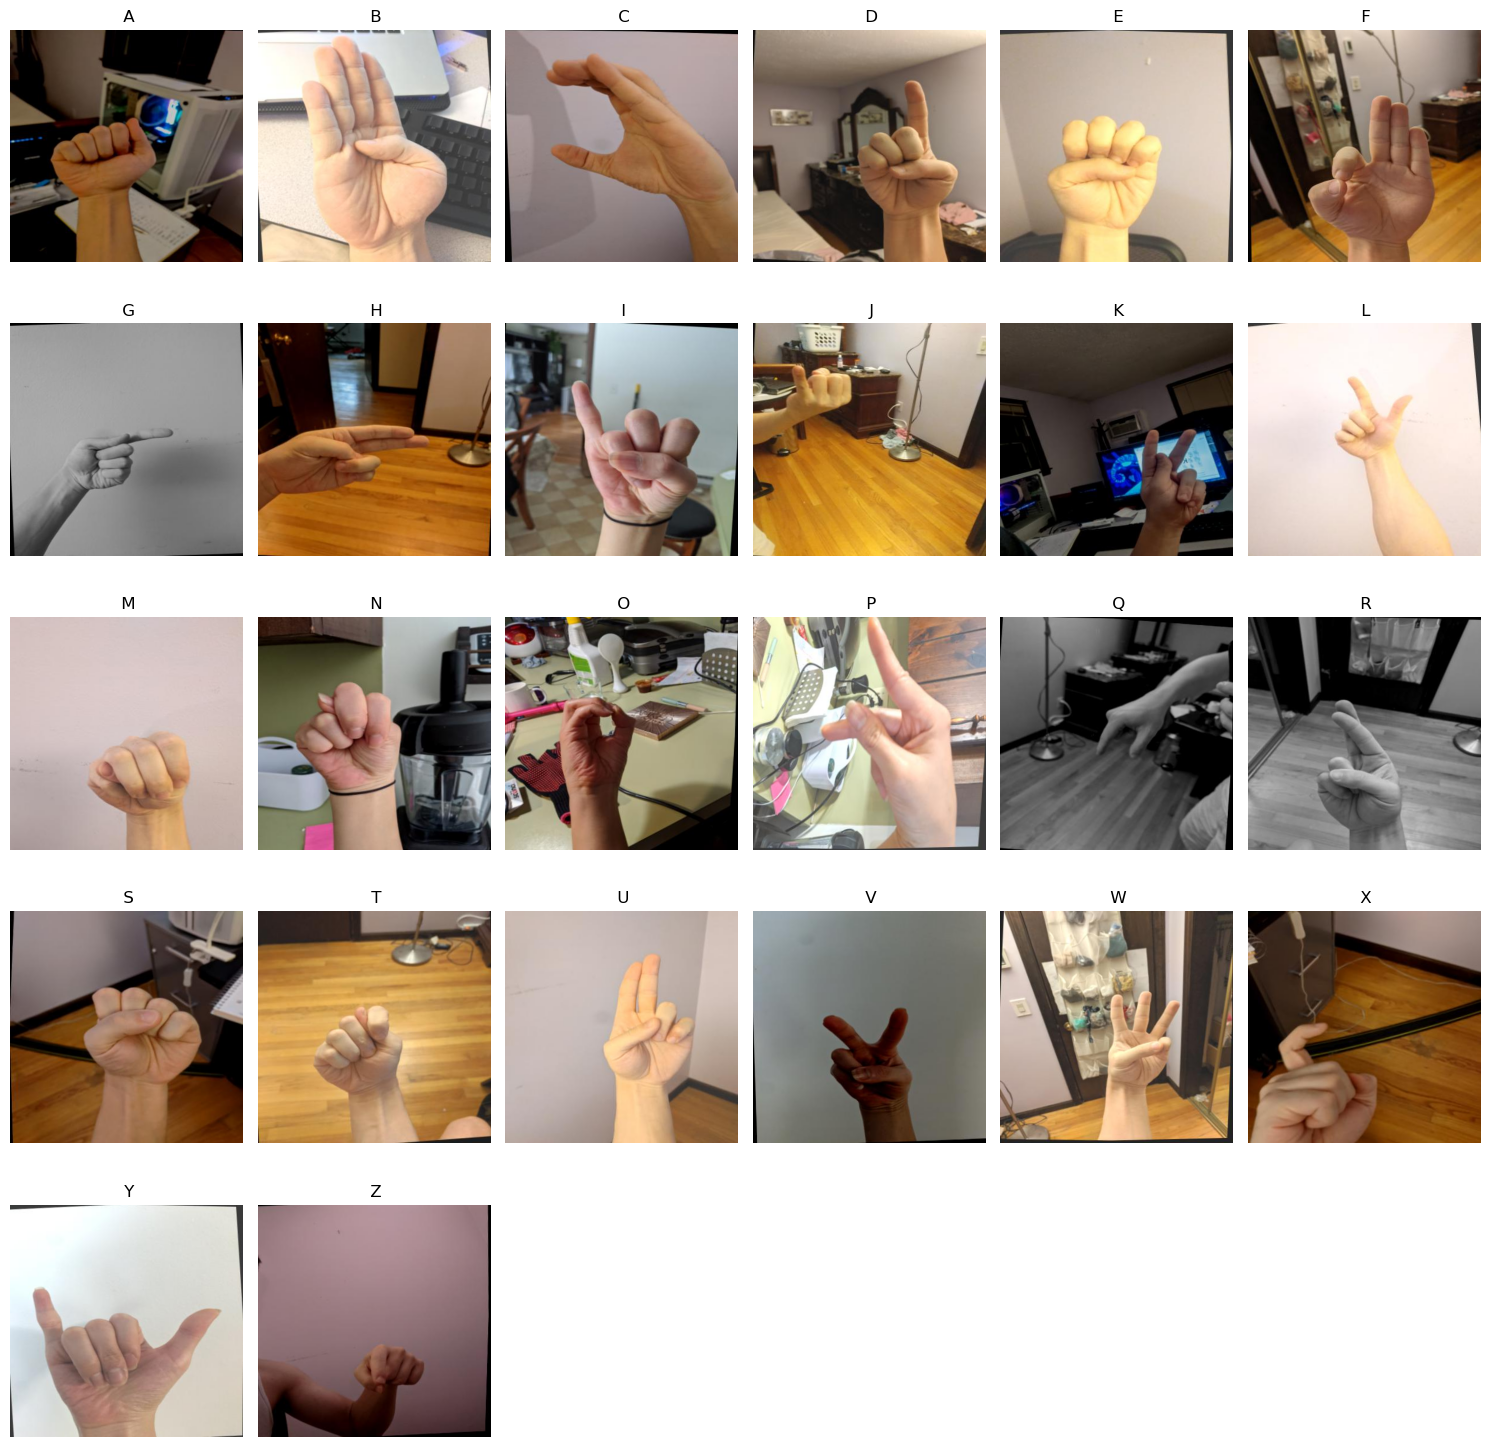

In [22]:
### Plot example of each letter
import os
os.makedirs("images", exist_ok=True)


ncols = 6
unique_labels = sorted(eda_df['label'].unique())
nrows = len(unique_labels)//ncols + 1

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
axes = axes.flatten()


for i, label in enumerate(unique_labels):
    fpath = eda_df.loc[ eda_df['label']==label,'filepath'].sample(1).values[0]
    
    loaded = plt.imread(fpath)
    axes[i].imshow(loaded)
    axes[i].set_title(label)
    axes[i].axis('off')
    

# remove unused axes
axes_labels_diff =  len(axes) - len(unique_labels)

if axes_labels_diff>0:
    for ax in axes[-axes_labels_diff:]:
        
        # difference = len(axes)
        fig.delaxes(ax=ax)   
        
fig.tight_layout()

fig.savefig("images/eda_example_letters.png", dpi=300, bbox_inches='tight', transparent=False)

    
    
    
    

In [23]:
# ### Plot example of each letter
# import os
# os.makedirs("images", exist_ok=True)

# ncols = 6
# unique_labels = sorted(eda_df['label'].unique())
# nrows = len(unique_labels)//ncols + 1

# fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
# axes = axes.flatten()


# for i, label in enumerate(unique_labels):
#     fpath = eda_df.loc[ eda_df['label']==label,'filepath'].sample(1).values[0]
    
#     loaded = plt.imread(fpath)
#     axes[i].imshow(loaded)
#     axes[i].set_title(label)
#     axes[i].axis('off')
    

# # remove unused axes
# axes_labels_diff =  len(axes) - len(unique_labels)

# if axes_labels_diff>0:
#     for ax in axes[-axes_labels_diff:]:
        
#         # difference = len(axes)
#         fig.delaxes(ax=ax)   
        
# fig.tight_layout()

# fig.savefig("images/eda_example_letters.png", dpi=300, bbox_inches='tight', transparent=False)

    
    
    
    

In [24]:
# df.loc[:,'label'] = df.loc[:,label_cols].apply(lambda x: x.idxmax(), axis=1)
# df['label'].value_counts().sort_index()

In [25]:
# image_paths = np.array(image_paths)
# labels = np.array(labels)
# image_paths.shape, labels.shape

### Construct Train/Test/Val Tensorflow Datasets

In [26]:
# load_image(image_paths[0], labels[0])
dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=len(dataset), reshuffle_each_iteration=False)

dataset.take(1).get_single_element()

(<tf.Tensor: shape=(), dtype=string, numpy=b'./American Sign Language Letters.v1-v1.multiclass/train/C18_jpg.rf.3f6c5a43677a27ecbe3a5796b44f8ddf.jpg'>,
 <tf.Tensor: shape=(26,), dtype=float64, numpy=
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])>)

In [27]:
tf.data.experimental.AUTOTUNE

-1

In [28]:

## Map the load_image function to the dataseta
dataset = dataset.map(lambda x,y: load_image(x,y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset.take(1).get_single_element()

2024-05-31 21:35:53.770013: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[87.14404   , 84.14404   , 75.14404   ],
         [91.041504  , 88.041504  , 79.041504  ],
         [93.70996   , 90.70996   , 81.70996   ],
         ...,
         [44.        , 55.        , 59.        ],
         [44.        , 55.        , 59.        ],
         [46.        , 57.        , 61.        ]],
 
        [[87.15625   , 84.15625   , 75.15625   ],
         [85.46875   , 82.46875   , 73.46875   ],
         [87.27417   , 84.27417   , 75.27417   ],
         ...,
         [43.        , 54.        , 58.        ],
         [43.        , 54.        , 58.        ],
         [43.765625  , 54.765625  , 58.765625  ]],
 
        [[84.21875   , 81.21875   , 72.21875   ],
         [83.21875   , 80.21875   , 71.21875   ],
         [83.913574  , 80.913574  , 71.913574  ],
         ...,
         [42.390625  , 53.390625  , 57.390625  ],
         [42.390625  , 53.390625  , 57.390625  ],
         [42.390625  , 53.390625  , 57.390625 

In [29]:
# Determine split sizes
total_size = len(dataset)
train_size = int(TRAIN_SPLIT * total_size)
val_size = int(VAL_SPLIT * total_size)
test_size = total_size - train_size - val_size
print(f"{train_size=}, {test_size=}, {val_size=}")


train_size=1058, test_size=228, val_size=226


In [30]:
# Split the dataset
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# # Cache the datset for faster access
# train_dataset = train_dataset.cache()
# val_dataset = val_dataset.cache()
# test_dataset = test_dataset.cache() 


In [31]:
# Batch and prefetch the datasets
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Shuffle the trainin data
train_dataset = train_dataset.shuffle(buffer_size=train_dataset.cardinality(), 
                                      reshuffle_each_iteration=True) # DOUBLE CHECK BATCH_SIZE * 8


In [32]:

# Use the datasets
for images, labels in train_dataset.take(1):
    print(f"Train batch - images: {images.shape}, labels: {labels.shape}")
    
for images, labels in val_dataset.take(1):
    print(f"Val batch - images: {images.shape}, labels: {labels.shape}")
    
    
for images, labels in test_dataset.take(1):
    print(f"Test batch - images: {images.shape}, labels: {labels.shape}")
    

Train batch - images: (32, 128, 128, 3), labels: (32, 26)
Val batch - images: (32, 128, 128, 3), labels: (32, 26)
Test batch - images: (32, 128, 128, 3), labels: (32, 26)


### Baseline Model (From towardsdatascience blog)
- from https://towardsdatascience.com/sign-language-recognition-with-advanced-computer-vision-7b74f20f3442


In [33]:
# Moedl from https://towardsdatascience.com/sign-language-recognition-with-advanced-computer-vision-7b74f20f3442
# from tensorflow
def make_model(name='towards-data-science',show_summary=False, use_schedule=False):
    model = models.Sequential(name=name)
    model.add(layers.Rescaling(1./255 , input_shape = (IMG_HEIGHT,IMG_WIDTH,3)))
    
    model.add(layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' ))#, input_shape = (28,28,1)))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(layers.Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(layers.Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    
    # Final layers
    model.add(layers.Flatten())
    model.add(layers.Dense(units = 512 , activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units = len(label_lookup   ) , activation = 'softmax'))
    
    
    ## JMI:
    if use_schedule:
        lr_schedule = optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
        )  # 0.9)
        optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    else:
        optimizer = optimizers.legacy.Adam()#learning_rate=0.01)
        
    model.compile(optimizer=optimizer, 
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    # model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    if show_summary:
        model.summary()
    return model


# Demonstrate model architecture
model = make_model(show_summary=True)

Model: "towards-data-science"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 75)      2100      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 75)     300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 64, 64, 50

#### `def get_callbacks`

In [34]:


def get_callbacks(monitor='val_accuracy', patience=15, start_from_epoch=3, restore_best_weights=False):
    """
    Returns a list of callbacks for training a model.

    Parameters:
    - monitor (str): The metric to monitor. Default is 'val_accuracy'.
    - patience (int): The number of epochs with no improvement after which training will be stopped. Default is 15.
    - start_from_epoch (int): The epoch from which to start counting the patience. Default is 3.
    - restore_best_weights (bool): Whether to restore the weights of the best epoch. Default is False.

    Returns:
    - callbacks (list): A list of callbacks to be used during model training.
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience,start_from_epoch=start_from_epoch,
                                                      monitor=monitor,
                                                      restore_best_weights=restore_best_weights, verbose=1)
    return [early_stopping]




In [35]:
## Scratch Code to create function
# # Baseline model
# model = make_model(show_summary=False, use_schedule=False)
# history = model.fit(train_dataset,epochs = 100,#0 ,
#                     validation_data = val_dataset, callbacks=get_callbacks())
# af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15),
#                                    target_names=label_lookup.values());

## Updating Evaluation to Handle Large # Classes

> With 26 classes, it is difficult to scan the performance for each class visually. Adding code to convert results to a datafarme and use pandas styling to visualize

In [36]:
## Scratch Code to create function
# results_dict = af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15), output_dict=True, target_names=label_lookup.values())
# results_dict.keys()

In [37]:
## Scratch Code to create function
# results_dict['test'].keys()

In [38]:
## Scratch Code to create function
# from IPython.display import clear_output
# results_dict = af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15), output_dict=True, target_names=label_lookup.values())
# clear_output()
# results = results_dict['test'].copy()
# try:
#     accuracy = results.pop('accuracy')
#     macro_avg = results.pop('macro avg')
#     _ = results.pop('weighted avg')
# except Exception as e:
#     display(e)

# results_df = pd.DataFrame(results).T
# results_df['support'] = results_df['support'].astype(int)
# results_df

In [39]:
## Scratch Code to create function

# overall_results = pd.DataFrame(macro_avg, index=['macro avg'])#.T
# overall_results.insert(0,'accuracy',accuracy)
# overall_results

In [40]:
## Scratch Code to create function

# accuracy, macro_avg
# results_df

In [41]:
def get_results_df(results_dict, results_key='test', 
                   average_rowname= 'macro avg',
                   include_support = True,
                   include_macro_avg=True):
    """
    Convert a results dictionary into a pandas DataFrame.

    Parameters:
    - results_dict (dict): A dictionary containing the results.
    - results_key (str): The key in the dictionary that contains the results. Default is 'test'.
    - average_rowname (str): The name of the row that represents the average. Default is 'macro avg'.
    - include_support (bool): Whether to include the 'support' column in the DataFrame. Default is True.
    - include_macro_avg (bool): Whether to include the 'macro avg' row in the DataFrame. Default is True.

    Returns:
    - results_df (pandas DataFrame): A DataFrame containing the results.

    """
    results = results_dict[results_key].copy()
    
    # Remove accuracy and macro avg from results
    accuracy = results.pop('accuracy')
    macro_avg = results.pop('macro avg')
    _ = results.pop('weighted avg')
    
    # Create DataFrames
    results_df = pd.DataFrame(results).T
    
    if include_macro_avg:
        overall_results = pd.DataFrame(macro_avg, index=[average_rowname])#.T
    
        ## Concatenate the overall results to the results_df
        results_df = pd.concat([results_df, overall_results],axis=0)
        results_df.loc[average_rowname,'accuracy'] = accuracy
    
    # Recast support as int
    results_df['support'] = results_df['support'].astype(int)

    # Move the support column to the end
    # results_df = results_df[ results_df.drop(columns='support').columns.tolist() + ['support']]
    
    if not include_support:
        results_df = results_df.drop(columns='support')
    
    return results_df


In [42]:
## Scratch Code to create function

# results_dict = af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15), output_dict=True, target_names=label_lookup.values())
# results_test = get_results_df(results_dict)
# results_test


In [43]:
## Scratch Code to create function

# results_test = get_results_df(results_dict, include_macro_avg=False, include_support=False)
# results_test.style.bar(color='#5fba7d')

In [44]:
## Scratch Code to create function

# results_test.style.background_gradient(cmap='Greens', vmax=1,vmin=0, axis=0)

### Added new kwarg to evaluate_classification_network

In [45]:
## Scratch Code to create function

# results_dict = af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15),
#                                                   output_dict=True, target_names=label_lookup.values(),
#                                                   as_frame=True,
#                                                   frame_include_macro_avg=False,frame_include_support=False)
# # results_test = get_results_df(results_dict)
# # results_test
# results_dict['test'].style.bar(color='#5fba7d')


###  New Custom Eval Function: `custom_evaluate_classification_network` (for Notebook use only)

In [46]:
def custom_evaluate_classification_network(model, X_test, history=None, figsize=(15,15), target_names=None,
                                             as_frame=True, frame_include_macro_avg=False, frame_include_support=False,
                                             display_bar=True, conf_matrix_text_kws={'fontsize': 'x-small'}):
    """
    Evaluate a classification model on a test dataset.

    Parameters:
    - model: The trained classification model.
    - X_test: The test dataset.
    - history: The training history of the model (optional).
    - figsize: The size of the figure for plotting the evaluation results (default: (15, 15)).
    - target_names: The names of the target classes (default: None).
    - as_frame: Whether to return the evaluation results as a pandas DataFrame (default: True).
    - frame_include_macro_avg: Whether to include macro average metrics in the DataFrame (default: False).
    - frame_include_support: Whether to include support values in the DataFrame (default: False).
    - display_bar: Whether to display the evaluation results as a styled bar chart (default: True).

    Returns:
    - results_dict: A dictionary containing the evaluation results.
    """
    if target_names is None:
        # label_lookup is in the global scope
        target_names = label_lookup.values()
        
    results_dict = af.evaluate_classification_network(model,
                                                      X_test=X_test,history=history, figsize=figsize,
                                                  output_dict=True, target_names=target_names,#label_lookup.values(),
                                                  as_frame=True,
                                                    frame_include_macro_avg=frame_include_macro_avg,
                                                    frame_include_support=frame_include_support,
                                                    values_format=".2f",
                                                    conf_matrix_text_kws=conf_matrix_text_kws)

    if display_bar:
        display(results_dict['test'].style.bar(color='#5fba7d').format(formatter= lambda x: f"{x:.2f}"))
    return results_dict

> 📌BOOKMARK: Controlling Text Size on Confusion Matrix 

In [47]:
# # results_dict['test'].style.bar(color='#5fba7d')
# results = custom_evaluate_classification_network(model,X_test=test_dataset, history=history, figsize=(15,15),
#                                                  conf_matrix_text_kws={'fontsize': 'x-small'},
#                                                  target_names=label_lookup.values(),display_bar=True,);


## Model 1 (with New Function)

In [48]:
## Show model architecture
model = make_model(show_summary=True, use_schedule=False)


Model: "towards-data-science"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 75)      2100      
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128, 75)     300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 50

Epoch 1/100
34/34 [==============================] - 4s 100ms/step - loss: 5.0128 - accuracy: 0.0926 - val_loss: 4.9130 - val_accuracy: 0.0487
Epoch 2/100
34/34 [==============================] - 3s 95ms/step - loss: 2.3714 - accuracy: 0.3601 - val_loss: 6.1431 - val_accuracy: 0.0398
Epoch 3/100
34/34 [==============================] - 4s 103ms/step - loss: 1.2845 - accuracy: 0.6569 - val_loss: 6.7582 - val_accuracy: 0.0354
Epoch 4/100
34/34 [==============================] - 3s 85ms/step - loss: 0.4669 - accuracy: 0.8592 - val_loss: 7.9847 - val_accuracy: 0.0354
Epoch 5/100
34/34 [==============================] - 3s 82ms/step - loss: 0.2343 - accuracy: 0.9367 - val_loss: 5.8001 - val_accuracy: 0.0619
Epoch 6/100
34/34 [==============================] - 3s 81ms/step - loss: 0.0848 - accuracy: 0.9764 - val_loss: 6.1488 - val_accuracy: 0.0575
Epoch 7/100
34/34 [==============================] - 3s 80ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 6.4665 - val_accuracy: 0.0310
Epoc

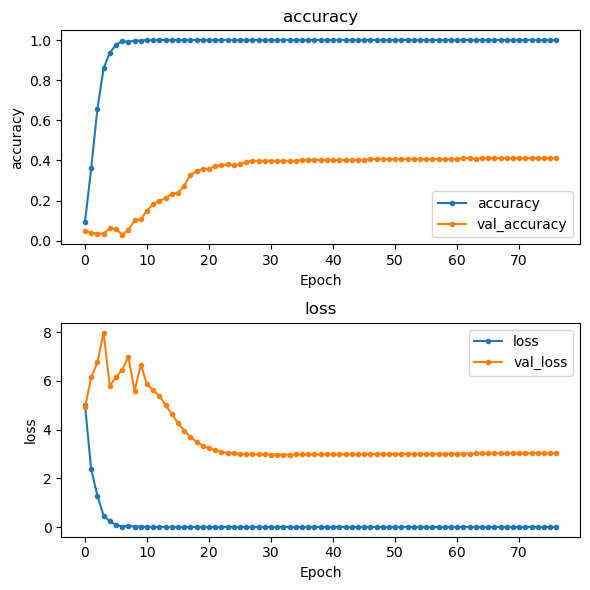


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.38      0.23      0.29        13
           B       0.00      0.00      0.00         5
           C       1.00      0.40      0.57        10
           D       0.40      0.44      0.42         9
           E       0.38      0.33      0.35         9
           F       0.12      0.14      0.13         7
           G       0.86      0.60      0.71        10
           H       1.00      0.20      0.33        10
           I       0.22      0.29      0.25        17
           J       0.40      0.33      0.36         6
           K       0.20      0.20      0.20         5
           L       0.32      0.64      0.42        11
           M       0.11      0.40      0.17         5
           N       0.40      0.33      0.

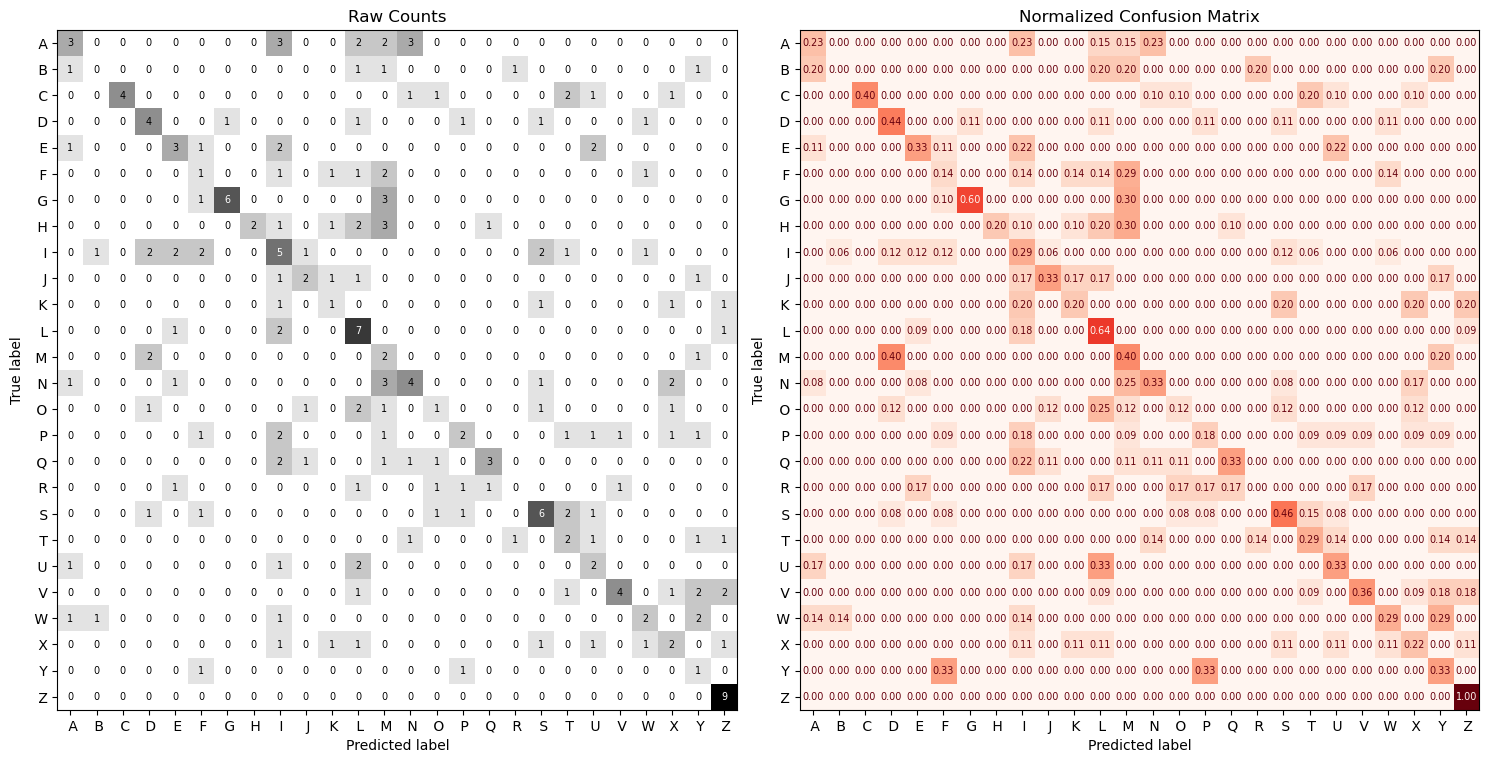


- Evaluating Test Data:
8/8 [==============================] - 1s 47ms/step - loss: 3.4975 - accuracy: 0.3421
{'loss': 3.497530937194824, 'accuracy': 0.34210526943206787}


CPU times: user 3min 41s, sys: 59.3 s, total: 4min 41s
Wall time: 4min 16s


In [49]:
%%time
# Baseline model
model = make_model(show_summary=False, use_schedule=False)
history = model.fit(train_dataset,epochs = 100,
                    validation_data = val_dataset, callbacks=get_callbacks())
# results_dict = af.evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15),
#                                                   output_dict=True, target_names=label_lookup.values(),
#                                                   as_frame=True,
#                                                   frame_include_macro_avg=False,frame_include_support=False)
results = custom_evaluate_classification_network(model,X_test=test_dataset, history=history, figsize=(15,15),
                                                 target_names=label_lookup.values(),display_bar=True,);

In [50]:
# if OVERRIDE_TESTING:
#     raise Exception("finish testing custom_evaluate_classification_network in eval function above.")
# # raise Exception("finish testing conf_matrix_text_kws in eval function above.")

### Model 1-LR: Adding LR Scheduling to Model 1

Epoch 1/100
34/34 [==============================] - 5s 118ms/step - loss: 41.1506 - accuracy: 0.0586 - val_loss: 50.0526 - val_accuracy: 0.0398
Epoch 2/100
34/34 [==============================] - 3s 80ms/step - loss: 4.7058 - accuracy: 0.1115 - val_loss: 3.2664 - val_accuracy: 0.0442
Epoch 3/100
34/34 [==============================] - 3s 79ms/step - loss: 2.9965 - accuracy: 0.1522 - val_loss: 3.3261 - val_accuracy: 0.0442
Epoch 4/100
34/34 [==============================] - 3s 94ms/step - loss: 2.8561 - accuracy: 0.1815 - val_loss: 3.2345 - val_accuracy: 0.1062
Epoch 5/100
34/34 [==============================] - 4s 100ms/step - loss: 2.6589 - accuracy: 0.2382 - val_loss: 3.4360 - val_accuracy: 0.1106
Epoch 6/100
34/34 [==============================] - 4s 94ms/step - loss: 2.6197 - accuracy: 0.2448 - val_loss: 3.2672 - val_accuracy: 0.1239
Epoch 7/100
34/34 [==============================] - 3s 83ms/step - loss: 2.4707 - accuracy: 0.2807 - val_loss: 3.3613 - val_accuracy: 0.1681
Ep

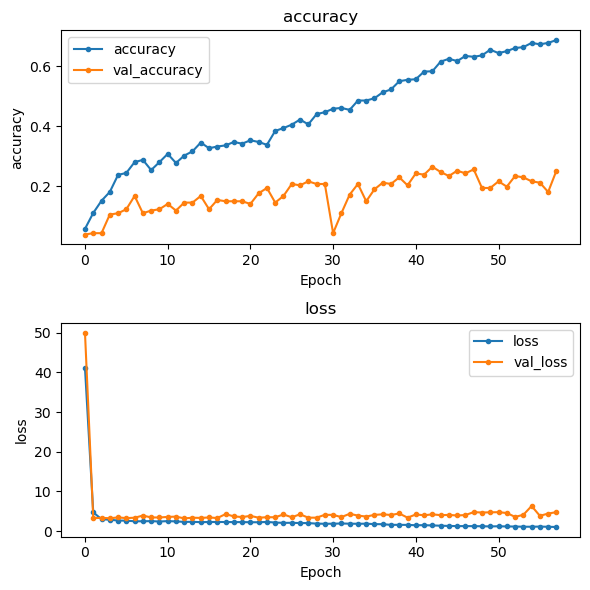


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.11      0.08      0.09        13
           B       0.00      0.00      0.00         5
           C       0.20      0.20      0.20        10
           D       0.33      0.22      0.27         9
           E       0.09      0.33      0.14         9
           F       0.00      0.00      0.00         7
           G       0.32      0.60      0.41        10
           H       0.50      0.10      0.17        10
           I       0.33      0.18      0.23        17
           J       0.20      0.33      0.25         6
           K       0.50      0.20      0.29         5
           L       0.09      0.09      0.09        11
           M       0.15      0.40      0.22         5
           N       0.60      0.25      0.

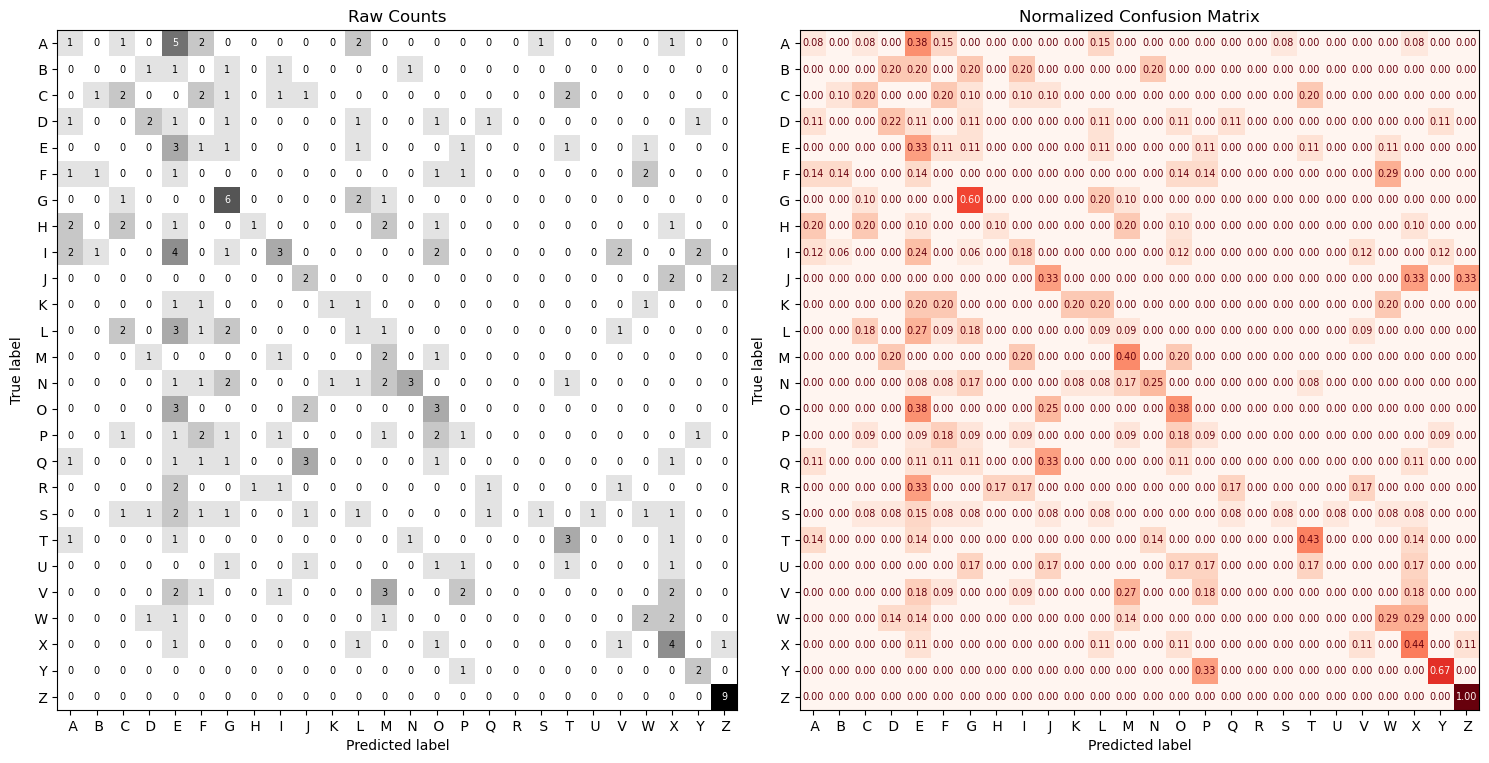


- Evaluating Test Data:
8/8 [==============================] - 0s 26ms/step - loss: 4.2246 - accuracy: 0.2281
{'loss': 4.224565029144287, 'accuracy': 0.22807016968727112}


CPU times: user 2min 47s, sys: 44.7 s, total: 3min 32s
Wall time: 2min 58s


In [51]:
%%time
# Baseline model
model = make_model(show_summary=False, 
                   use_schedule=True # Adding learning rate scheduling
                   )
history = model.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())

results = custom_evaluate_classification_network(model,X_test=test_dataset,history=history, figsize=(15,15),
                                                 target_names=label_lookup.values(),display_bar=True);


## Model2 (Custom)

In [52]:

def make_model2(name='CNN1',show_summary=False,use_schedule=False):
    
    model = models.Sequential(name=name)
    # Using rescaling layer to scale pixel values
    model.add(layers.Rescaling(1./255 , input_shape = (IMG_HEIGHT,IMG_WIDTH,3)))
    
    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=16,  # How many filters you want to use
            kernel_size=3, # size of each filter
            # input_shape=input_shape,
            padding='same')) 
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling


    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=32,#64,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            # input_shape=input_shape,
            padding='same')) 
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling
    
    # Flattening layer
    model.add(layers.Flatten())
    # Output layer
    model.add(
        layers.Dense(len(label_lookup), activation="softmax") )  
    
        
    ## JMI:
    if use_schedule:
        lr_schedule = optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
        )  # 0.9)
        optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    else:
        optimizer = optimizers.legacy.Adam()#learning_rate=0.01)
    
    # ## Adding learning rate decay
    # lr_schedule = optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    # )  # 0.9)
    # optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    
    model.compile(optimizer=optimizer, 
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    if show_summary:
        model.summary()
    return model

In [53]:
## Show model architecture
model2 = make_model2(name="cnn1-fixed-lr", show_summary=True, use_schedule=False)


Model: "cnn1-fixed-lr"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 32768)           

Epoch 1/100
34/34 [==============================] - 2s 35ms/step - loss: 3.5222 - accuracy: 0.1134 - val_loss: 3.0659 - val_accuracy: 0.1593
Epoch 2/100
34/34 [==============================] - 1s 31ms/step - loss: 2.5136 - accuracy: 0.3034 - val_loss: 2.8577 - val_accuracy: 0.1814
Epoch 3/100
34/34 [==============================] - 1s 29ms/step - loss: 1.9231 - accuracy: 0.5047 - val_loss: 2.7805 - val_accuracy: 0.2124
Epoch 4/100
34/34 [==============================] - 1s 28ms/step - loss: 1.3792 - accuracy: 0.6730 - val_loss: 2.5566 - val_accuracy: 0.3319
Epoch 5/100
34/34 [==============================] - 1s 29ms/step - loss: 0.8604 - accuracy: 0.8043 - val_loss: 2.5690 - val_accuracy: 0.3274
Epoch 6/100
34/34 [==============================] - 1s 28ms/step - loss: 0.5235 - accuracy: 0.8904 - val_loss: 2.4664 - val_accuracy: 0.3540
Epoch 7/100
34/34 [==============================] - 1s 28ms/step - loss: 0.3093 - accuracy: 0.9537 - val_loss: 2.4930 - val_accuracy: 0.4071
Epoch 

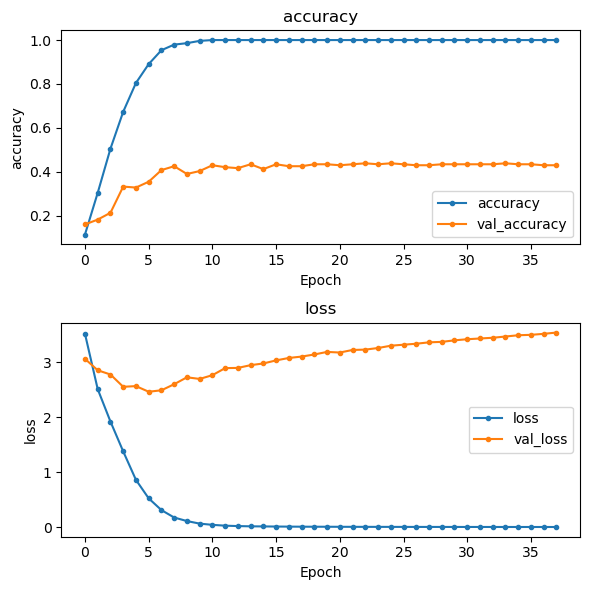


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.43      0.23      0.30        13
           B       0.25      0.40      0.31         5
           C       0.71      0.50      0.59        10
           D       0.62      0.56      0.59         9
           E       0.20      0.22      0.21         9
           F       0.20      0.14      0.17         7
           G       0.67      0.80      0.73        10
           H       0.20      0.10      0.13        10
           I       0.25      0.24      0.24        17
           J       0.44      0.67      0.53         6
           K       0.20      0.20      0.20         5
           L       0.27      0.55      0.36        11
           M       0.25      0.40      0.31         5
           N       0.44      0.33      0.

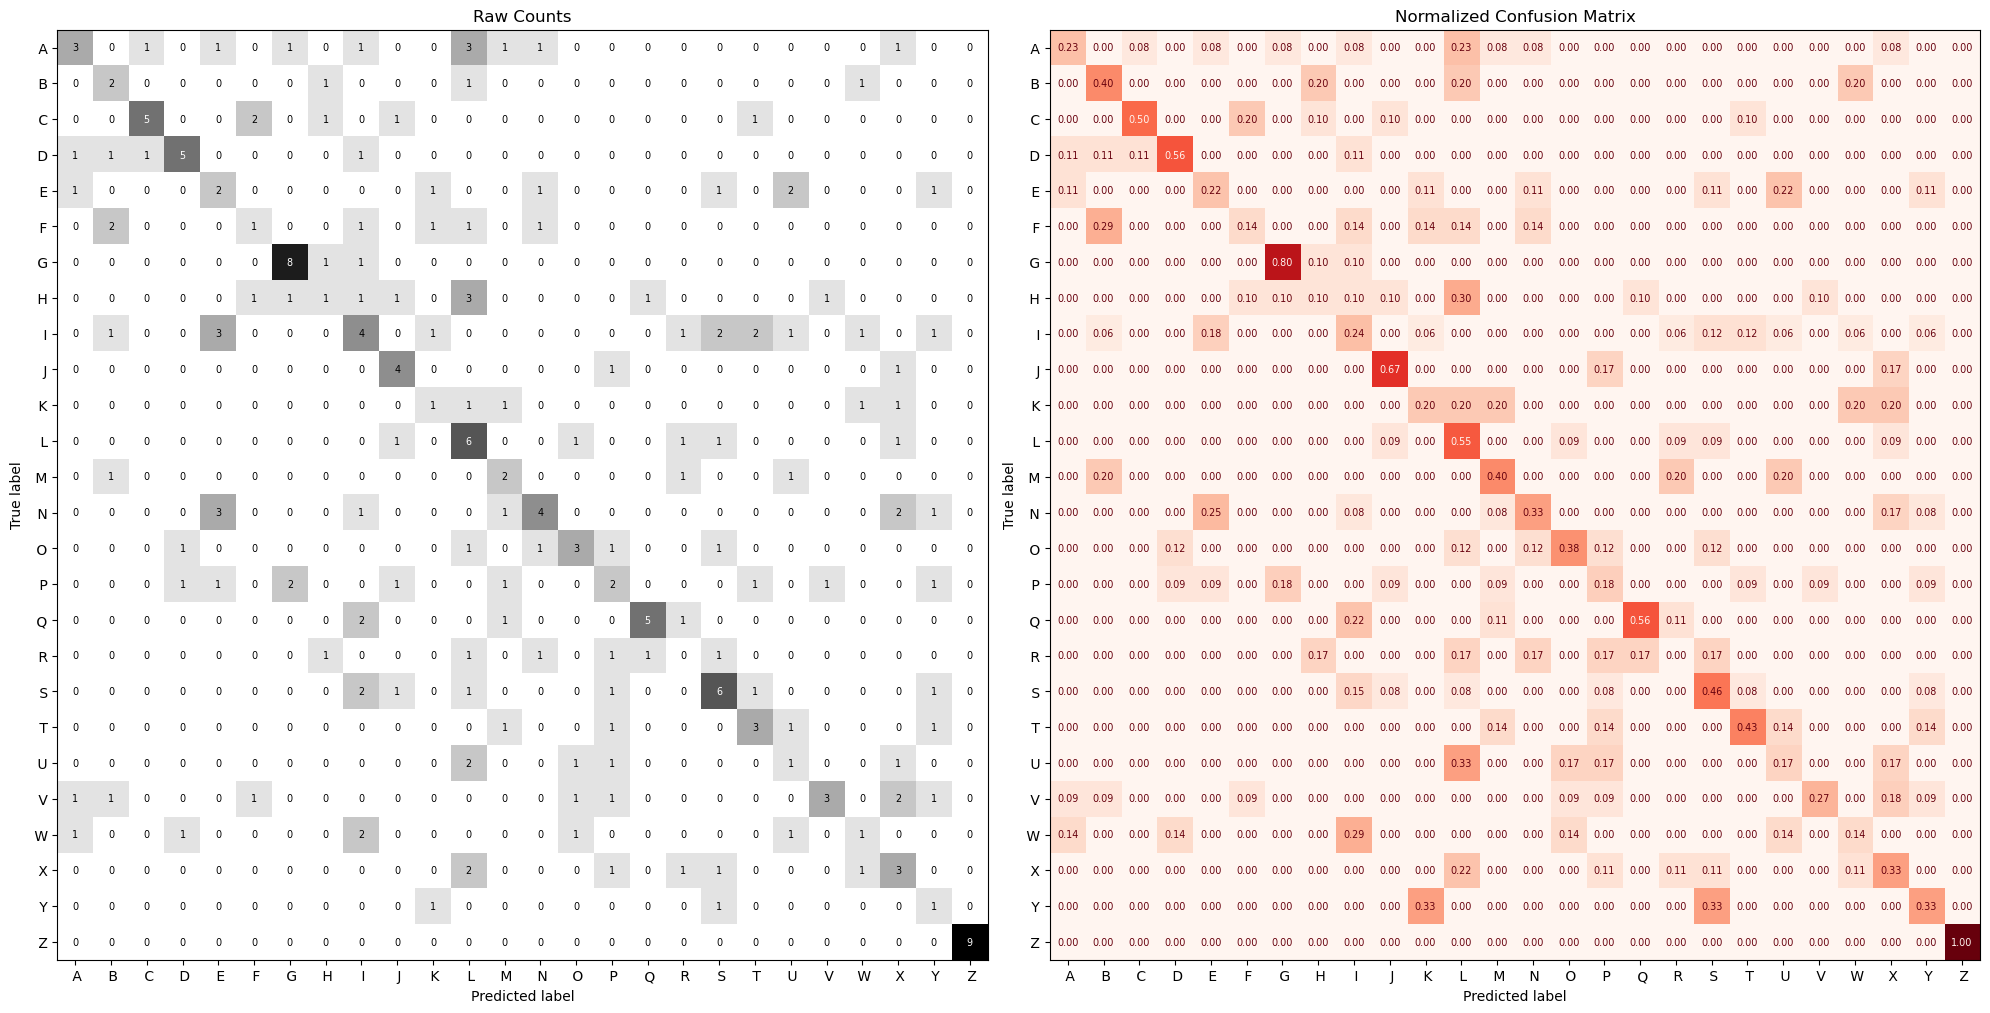


- Evaluating Test Data:
8/8 [==============================] - 0s 17ms/step - loss: 3.9465 - accuracy: 0.3728
{'loss': 3.9465363025665283, 'accuracy': 0.37280702590942383}


CPU times: user 1min 42s, sys: 26.4 s, total: 2min 8s
Wall time: 50.1 s


In [54]:
%%time
model2 = make_model2(name="cnn1-fixed-lr", show_summary=False, use_schedule=False)
history2 = model2.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())
# results_dict = af.evaluate_classification_network(model2,X_test=test_dataset,history=history2, figsize=(15,15), output_dict=True, target_names=label_lookup.values())
# results_dict.keys()
results_dict = custom_evaluate_classification_network(model2,X_test=test_dataset,history=history2, figsize=(20,20), 
                                                      target_names=label_lookup.values(),
                                                      as_frame=True, frame_include_macro_avg=False, frame_include_support=False,
                                                      display_bar=True)

### Adding LR Scheduling with Exponential Decay

Epoch 1/100
34/34 [==============================] - 2s 36ms/step - loss: 31.4241 - accuracy: 0.0454 - val_loss: 12.7319 - val_accuracy: 0.0575
Epoch 2/100
34/34 [==============================] - 1s 29ms/step - loss: 10.3194 - accuracy: 0.0945 - val_loss: 7.4461 - val_accuracy: 0.0796
Epoch 3/100
34/34 [==============================] - 1s 29ms/step - loss: 4.7624 - accuracy: 0.2193 - val_loss: 3.5480 - val_accuracy: 0.1504
Epoch 4/100
34/34 [==============================] - 1s 31ms/step - loss: 2.1605 - accuracy: 0.4716 - val_loss: 3.0088 - val_accuracy: 0.2212
Epoch 5/100
34/34 [==============================] - 1s 29ms/step - loss: 1.2149 - accuracy: 0.7042 - val_loss: 3.1043 - val_accuracy: 0.2257
Epoch 6/100
34/34 [==============================] - 1s 29ms/step - loss: 0.7178 - accuracy: 0.8195 - val_loss: 2.4658 - val_accuracy: 0.3850
Epoch 7/100
34/34 [==============================] - 1s 29ms/step - loss: 0.4088 - accuracy: 0.9168 - val_loss: 2.6147 - val_accuracy: 0.3319
Epo

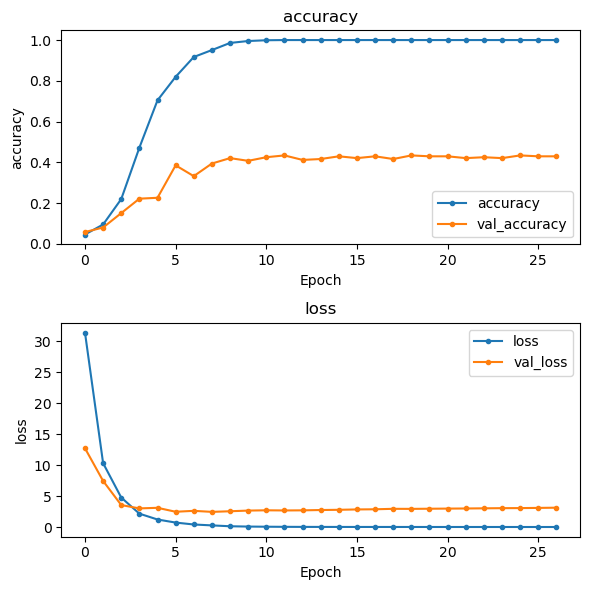


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.44      0.31      0.36        13
           B       0.29      0.40      0.33         5
           C       0.67      0.60      0.63        10
           D       0.50      0.56      0.53         9
           E       0.00      0.00      0.00         9
           F       0.14      0.14      0.14         7
           G       0.40      0.80      0.53        10
           H       0.25      0.10      0.14        10
           I       0.33      0.47      0.39        17
           J       0.50      0.33      0.40         6
           K       0.50      0.40      0.44         5
           L       0.45      0.45      0.45        11
           M       0.22      0.40      0.29         5
           N       0.00      0.00      0.

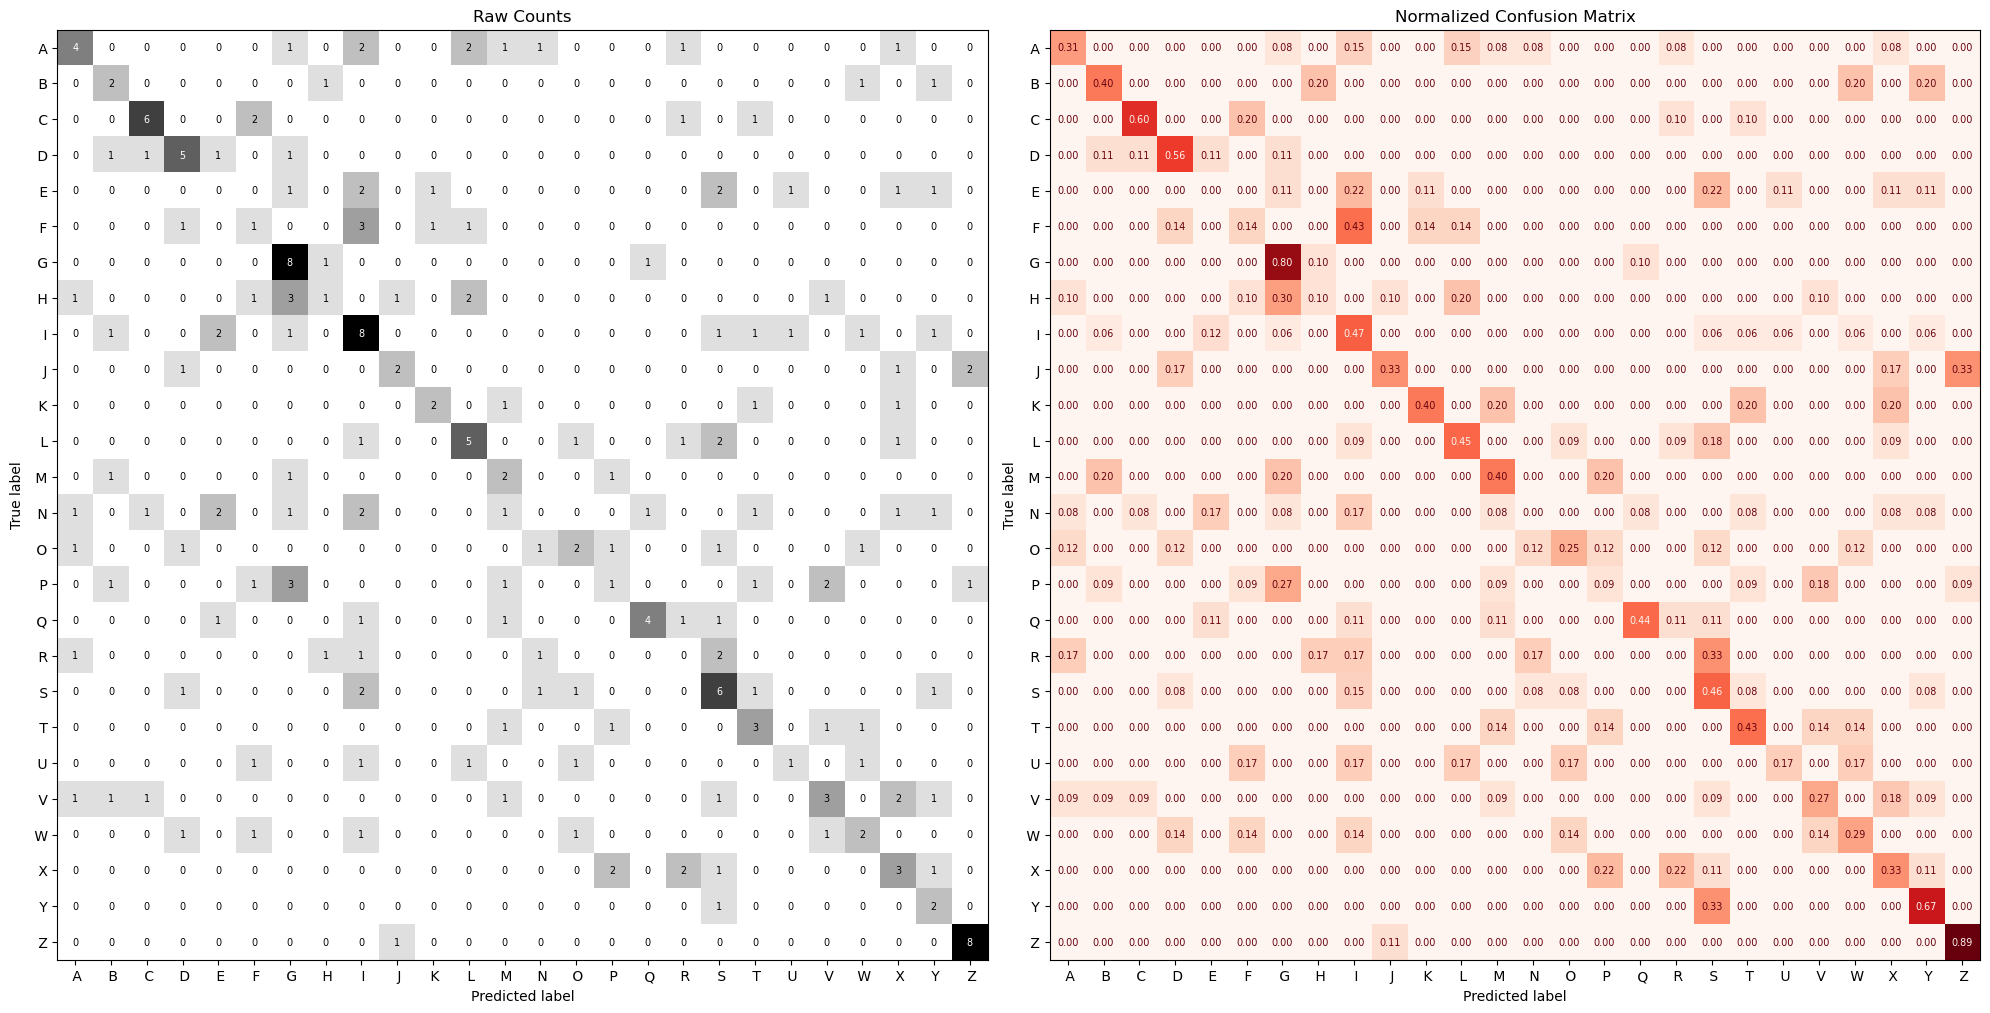


- Evaluating Test Data:
8/8 [==============================] - 0s 21ms/step - loss: 3.6206 - accuracy: 0.3553
{'loss': 3.6206014156341553, 'accuracy': 0.3552631437778473}


CPU times: user 1min 14s, sys: 19 s, total: 1min 33s
Wall time: 34.8 s


In [55]:
%%time
model2_lr = make_model2(use_schedule=True, show_summary=False, name="cnn1-scheduled-lr")
history_lr = model2_lr.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())
# results_dict = af.evaluate_classification_network(model2,X_test=test_dataset,history=history2, figsize=(15,15), output_dict=True, target_names=label_lookup.values())
# results_dict.keys()
results_dict = custom_evaluate_classification_network(model2_lr,X_test=test_dataset,history=history_lr, figsize=(20,20), 
                                                      target_names=label_lookup.values(),
                                                      as_frame=True, frame_include_macro_avg=False, frame_include_support=False,
                                                      display_bar=True)

## Transfer Learning



| Model             |   Size (MB) | Top-1 Accuracy   | Top-5 Accuracy   | Parameters   | Depth   | Time (ms) per inference step (CPU)   | Time (ms) per inference step (GPU)   |
|:------------------|------------:|:-----------------|:-----------------|:-------------|:--------|:-------------------------------------|:-------------------------------------|
| **VGG16**             |      528    | 71.3%            | 90.1%            | 138.4M       | 16      | 69.5                                 | 4.2                                  |
| **EfficientNetB0**    |       29    | 77.1%            | 93.3%            | 5.3M         | 132     | 46.0                                 | 4.9                                  |
| **InceptionV3**       |       92    | 77.9%            | 93.7%            | 23.9M        | 189     | 42.2                                 | 6.9                                  |

*Excerpt from Source: "https://keras.io/api/applications/"*

In [56]:
input_shape = (IMG_HEIGHT,IMG_WIDTH,3)
input_shape

(128, 128, 3)

### VGG16

In [57]:
# Downloading just the convolutional base
vgg16_base = tf.keras.applications.VGG16(
    include_top=False, weights="imagenet", input_shape=input_shape
)
# Prevent layers from base_model from changing 
vgg16_base.trainable = False

# Create the preprocessing lamdba layer
# Create a lambda layer for the preprocess input function for the model
lambda_layer_vgg16 = tf.keras.layers.Lambda(
    tf.keras.applications.vgg16.preprocess_input, name="preprocess_input"
)



def make_vgg16_model(show_summary=False):
    model = models.Sequential(name="VGG16")
    # Use input layer (lambda layer will handle rescaling).
    model.add(tf.keras.layers.Input(shape=input_shape))

    ## Adding preprocessing lamabda layer
    model.add(lambda_layer_vgg16)

    # Add pretrained base
    model.add(vgg16_base)

    # Flattening layer
    model.add(layers.Flatten())

    ## Adding a Hidden Dense Layer
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(len(label_lookup.values()), activation="softmax"))

    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(),
        # loss=tf.keras.losses.BinaryCrossentropy(),
        loss = tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )
    
    if show_summary:
        model.summary()
        
    return model


Epoch 1/100
34/34 [==============================] - 5s 117ms/step - loss: 10.8171 - accuracy: 0.1446 - val_loss: 2.6755 - val_accuracy: 0.2522
Epoch 2/100
34/34 [==============================] - 4s 102ms/step - loss: 2.0393 - accuracy: 0.4121 - val_loss: 2.4910 - val_accuracy: 0.3717
Epoch 3/100
34/34 [==============================] - 4s 102ms/step - loss: 1.5258 - accuracy: 0.5491 - val_loss: 2.1798 - val_accuracy: 0.4115
Epoch 4/100
34/34 [==============================] - 4s 104ms/step - loss: 1.1848 - accuracy: 0.6248 - val_loss: 2.2765 - val_accuracy: 0.4690
Epoch 5/100
34/34 [==============================] - 4s 102ms/step - loss: 0.9808 - accuracy: 0.7013 - val_loss: 2.0453 - val_accuracy: 0.4779
Epoch 6/100
34/34 [==============================] - 4s 102ms/step - loss: 0.8238 - accuracy: 0.7495 - val_loss: 2.0969 - val_accuracy: 0.5265
Epoch 7/100
34/34 [==============================] - 4s 102ms/step - loss: 0.7142 - accuracy: 0.7854 - val_loss: 2.1820 - val_accuracy: 0.469

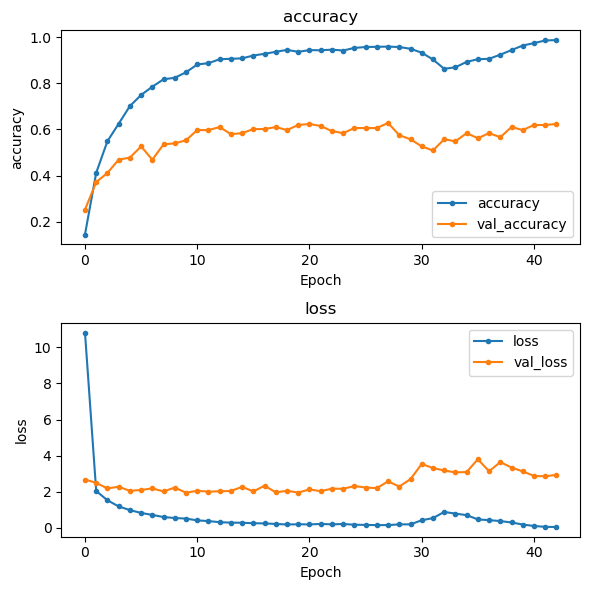


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.67      0.46      0.55        13
           B       0.18      0.40      0.25         5
           C       0.58      0.70      0.64        10
           D       0.62      0.56      0.59         9
           E       0.54      0.78      0.64         9
           F       0.50      0.57      0.53         7
           G       0.62      0.80      0.70        10
           H       1.00      0.50      0.67        10
           I       1.00      0.35      0.52        17
           J       0.42      0.83      0.56         6
           K       0.57      0.80      0.67         5
           L       0.56      0.91      0.69        11
           M       0.50      0.60      0.55         5
           N       0.46      0.50      0.

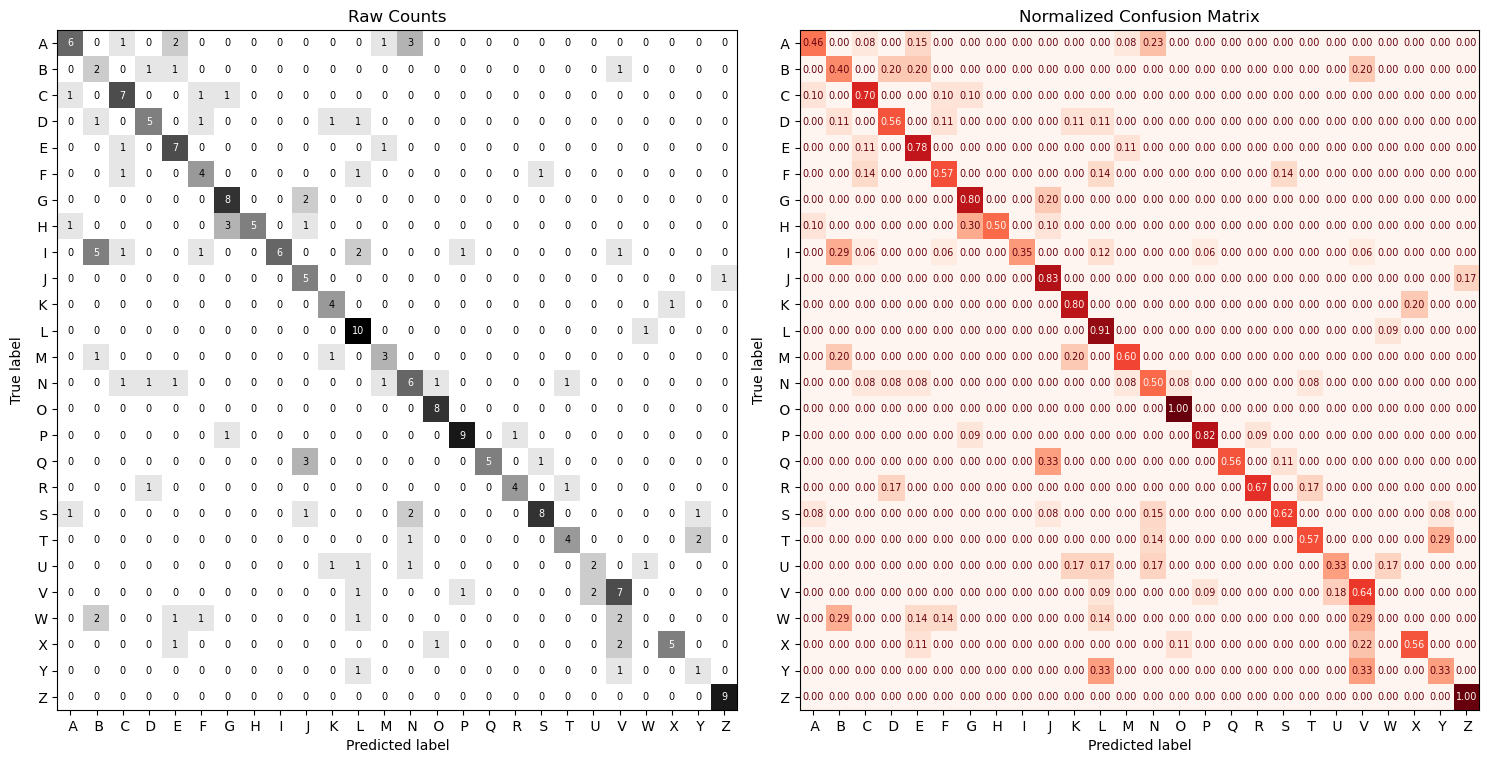


- Evaluating Test Data:
8/8 [==============================] - 1s 100ms/step - loss: 3.2763 - accuracy: 0.6140
{'loss': 3.2762887477874756, 'accuracy': 0.6140350699424744}


CPU times: user 2min 4s, sys: 41.3 s, total: 2min 45s
Wall time: 2min 43s


In [58]:
%%time
# Baseline model
model_vgg = make_vgg16_model(show_summary=False, 
                
                   )
history = model_vgg.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())

results = custom_evaluate_classification_network(model_vgg,X_test=test_dataset,history=history, figsize=(15,15),
                                                 target_names=label_lookup.values(),display_bar=True);


In [70]:
# raise Exception('not ready for below')

### EfficientNet

In [67]:
# Download EfficientNet base
efficientnet_base =tf.keras.applications.EfficientNetB0(include_top=False, 
                                                       input_shape=input_shape)
efficientnet_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_15 (Rescaling)       (None, 128, 128, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 128, 128, 3)  7          ['rescaling_15[0][0]']           
 )                                                                                                
                                                                                     

In [ ]:

# Make it not-trainable
efficientnet_base.trainable=False

# add preprocessing lambda layer
lambda_layer_efficient = tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input, 
                                      name='preprocess_input_enet')

def make_efficientnet_model(show_summary=True):
    model = models.Sequential(name="EfficientNetB0")
    # Use input layer (lambda layer will handle rescaling).
    model.add(tf.keras.layers.Input(shape=input_shape))

    ## Adding preprocessing lamabda layer
    model.add(lambda_layer_efficient)

    # Add pretrained base
    model.add(efficientnet_base)

    # Flattening layer
    model.add(layers.Flatten())

    ## Adding a Hidden Dense Layer
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(len(label_lookup.values()), activation="softmax"))

    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )
    
    if show_summary:
        model.summary()
    return model

# vk.layered_view(efficientnet_base, legend=True)

In [68]:
# model_eff = make_efficientnet_model(show_summary=True)

Epoch 1/100
34/34 [==============================] - 44s 688ms/step - loss: 2.8311 - accuracy: 0.3601 - val_loss: 1.7206 - val_accuracy: 0.4912
Epoch 2/100
34/34 [==============================] - 5s 147ms/step - loss: 0.1630 - accuracy: 0.9594 - val_loss: 0.9343 - val_accuracy: 0.7080
Epoch 3/100
34/34 [==============================] - 5s 130ms/step - loss: 0.0183 - accuracy: 0.9972 - val_loss: 0.8119 - val_accuracy: 0.7566
Epoch 4/100
34/34 [==============================] - 5s 133ms/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 0.6644 - val_accuracy: 0.7876
Epoch 5/100
34/34 [==============================] - 5s 132ms/step - loss: 5.3996e-04 - accuracy: 1.0000 - val_loss: 0.6199 - val_accuracy: 0.8097
Epoch 6/100
34/34 [==============================] - 5s 128ms/step - loss: 4.0325e-04 - accuracy: 1.0000 - val_loss: 0.5968 - val_accuracy: 0.8230
Epoch 7/100
34/34 [==============================] - 5s 128ms/step - loss: 3.2257e-04 - accuracy: 1.0000 - val_loss: 0.5875 - val_acc

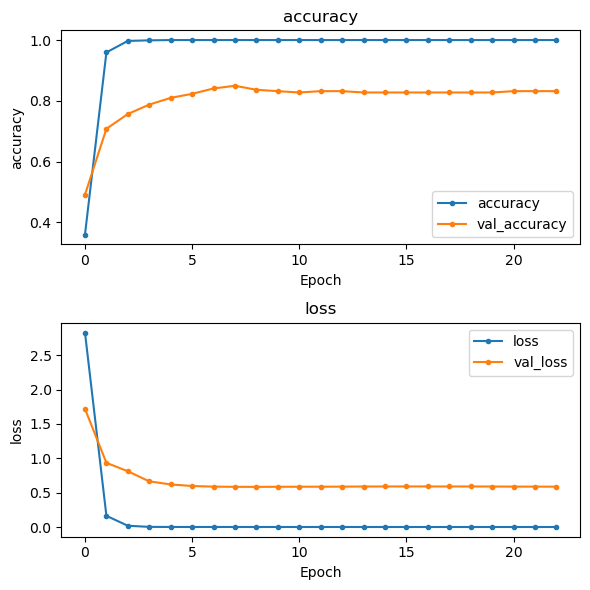


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.93      1.00      0.96        13
           B       1.00      1.00      1.00         5
           C       1.00      0.90      0.95        10
           D       0.67      0.67      0.67         9
           E       0.82      1.00      0.90         9
           F       0.62      0.71      0.67         7
           G       0.69      0.90      0.78        10
           H       0.60      0.60      0.60        10
           I       0.90      0.53      0.67        17
           J       0.86      1.00      0.92         6
           K       1.00      1.00      1.00         5
           L       0.75      0.82      0.78        11
           M       0.50      0.40      0.44         5
           N       0.56      0.42      0.

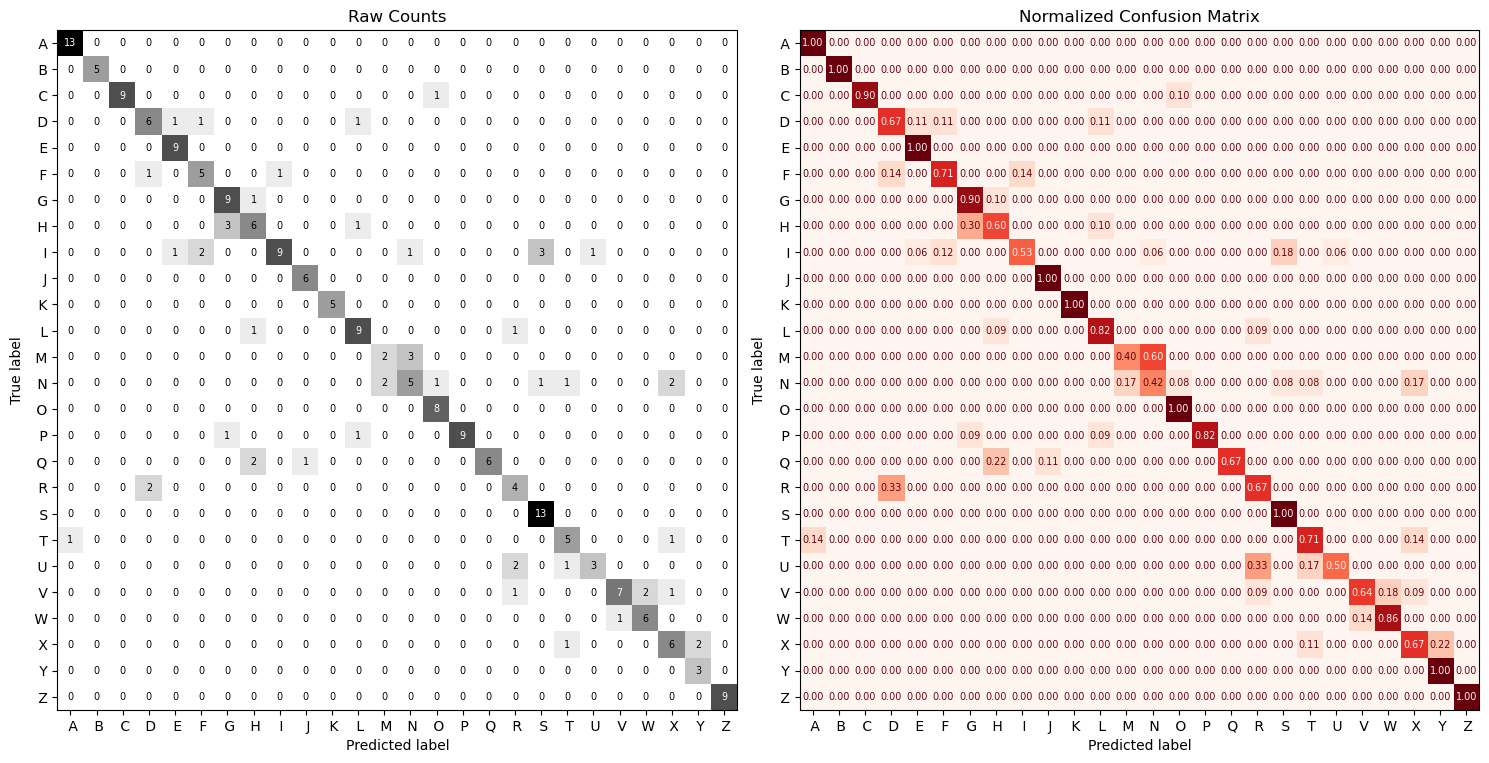


- Evaluating Test Data:
8/8 [==============================] - 2s 238ms/step - loss: 0.8256 - accuracy: 0.7763
{'loss': 0.8255632519721985, 'accuracy': 0.7763158082962036}


CPU times: user 2min 47s, sys: 31.5 s, total: 3min 18s
Wall time: 2min 40s


In [69]:
%%time
# Baseline model
model_eff = make_efficientnet_model(show_summary=False)
history = model_eff.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())

results = custom_evaluate_classification_network(model_eff,X_test=test_dataset,history=history, figsize=(15,15),
                                                 target_names=label_lookup.values(),display_bar=True);


### Full EfficientNet

> 🚨 Need to change IMG_HEIGHT, IMG_WIDTH to 224 to use top of efficientnet

In [72]:
# # Download EfficientNet base
# efficientnet_full =tf.keras.applications.EfficientNetB0(include_top=True, 
#                                                        input_shape=input_shape)
# efficientnet_full.summary()

## To Do: Keras Tuner

In [ ]:
# ## Fit and evaluate model with custom function
# model2 = make_model2()
# history2 = model2.fit(train_dataset,epochs = 100 ,validation_data = val_dataset, callbacks=get_callbacks())
# results_dict = custom_evaluate_classification_network(model2,X_test=test_dataset,history=history2, figsize=(15,15), 
#                                                       target_names=label_lookup.values(),
#                                                       as_frame=True, frame_include_macro_avg=False, frame_include_support=False,
#                                                       display_bar=True)

## To Do: Add LimeExplanations

In [84]:
BEST_MODEL = model_eff   #None

#### Convert test data to numpy arrays

In [86]:
%%time
# timing WITH converting classes
y_test, y_hat_test, X_test = af.get_true_pred_labels_images(BEST_MODEL,test_dataset,
                                                         convert_y_for_sklearn=True)
y_test[0], y_hat_test[0]

CPU times: user 5.03 s, sys: 772 ms, total: 5.8 s
Wall time: 4.03 s


(9, 9)

In [87]:
label_lookup

{0: ' A',
 1: ' B',
 2: ' C',
 3: ' D',
 4: ' E',
 5: ' F',
 6: ' G',
 7: ' H',
 8: ' I',
 9: ' J',
 10: ' K',
 11: ' L',
 12: ' M',
 13: ' N',
 14: ' O',
 15: ' P',
 16: ' Q',
 17: ' R',
 18: ' S',
 19: ' T',
 20: ' U',
 21: ' V',
 22: ' W',
 23: ' X',
 24: ' Y',
 25: ' Z'}

In [88]:
i = 10
y_test[i]

5

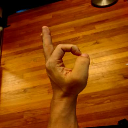

True Label:  F
Predicted:  F


In [89]:
# select an image index to use/view
i = 10

# Show actual-sized image with keras
display(array_to_img(X_test[i]))
print(f"True Label: {label_lookup[y_test[i]]}")
print(f"Predicted: {label_lookup[y_hat_test[i]]}")

### LimeExplainer

In [90]:
from skimage.segmentation import mark_boundaries
from lime import lime_image

In [91]:
explainer = lime_image.LimeImageExplainer(verbose=False)#,random_state=321)
explainer

In [92]:
# Get the explanation object for the chosen
explanation = explainer.explain_instance(X_test[i], # Convert image values to ints    
                                         model.predict, # Prediction method/function
                                         top_labels=1, # How many of the labels to explain [?]
                                         hide_color=0, #
                                         num_samples=1000,
                                        )

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 12ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


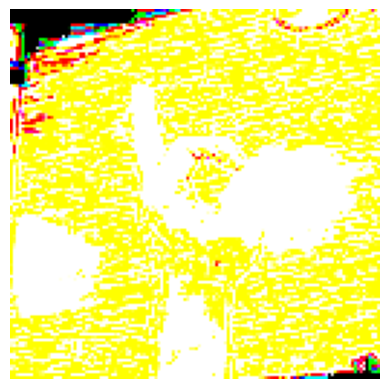

In [93]:
# Stored original image
plt.imshow(explanation.image)#.astype(int));
plt.axis('off');

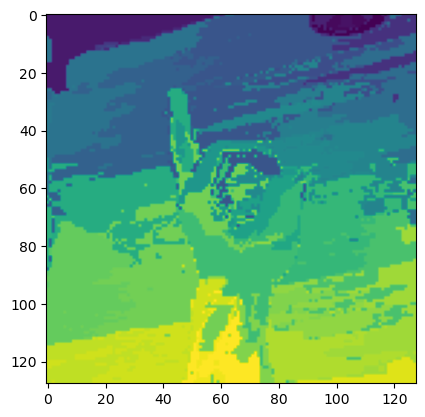

In [94]:
# Explanation split image into "segments"
plt.imshow(explanation.segments); 

In [95]:
# Unique Segments
np.unique(explanation.segments)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


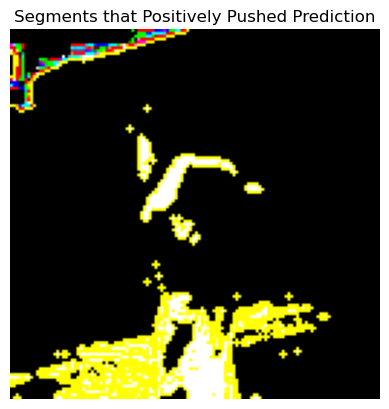

In [96]:
#pros and cons
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=5, 
                                            hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.title('Segments that Positively Pushed Prediction');

In [97]:
#pros and cons
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            negative_only=True, 
                                            positive_only=False,
                                            num_features=5, 
                                            hide_rest=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


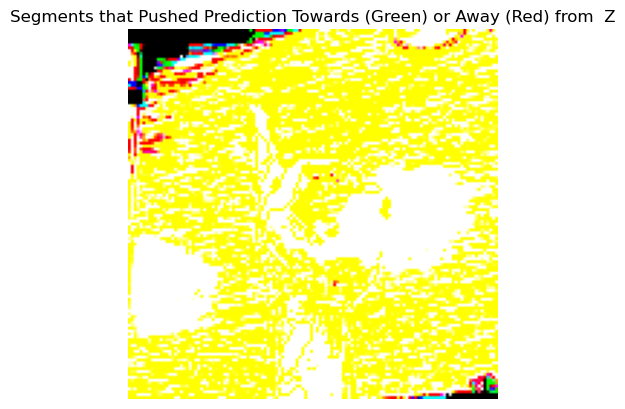

In [99]:
#pros and cons
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            negative_only=False, 
                                            positive_only=False,
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.title(f'Segments that Pushed Prediction Towards (Green) or Away (Red) from {label}');

In [100]:
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

from IPython.display import clear_output

def plot_comparison(main_image, img, mask):
    """Adapted from Source:
    https://coderzcolumn.com/tutorials/artificial-intelligence/lime-explain-keras-image-classification-network-predictions"""
    fig,axes = plt.subplots(ncols=4,figsize=(15,5))

    # show original image
    ax = axes[0]
    ax.imshow(main_image)#.astype(int))#, cmap="gray");
    ax.set_title("Original Image")
    ax.axis('off')

    ax =axes[1]
    ax.imshow(img)#.astype(int));
    ax.set_title("Image")
    ax.axis('off')
    
    ax = axes[2]
    ax.imshow(mask);
    ax.set_title("Mask")
    ax.axis('off')
    
    ax = axes[3]
    ax.imshow(mark_boundaries(img,
                              mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");
    ax.axis('off')
    fig.tight_layout()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


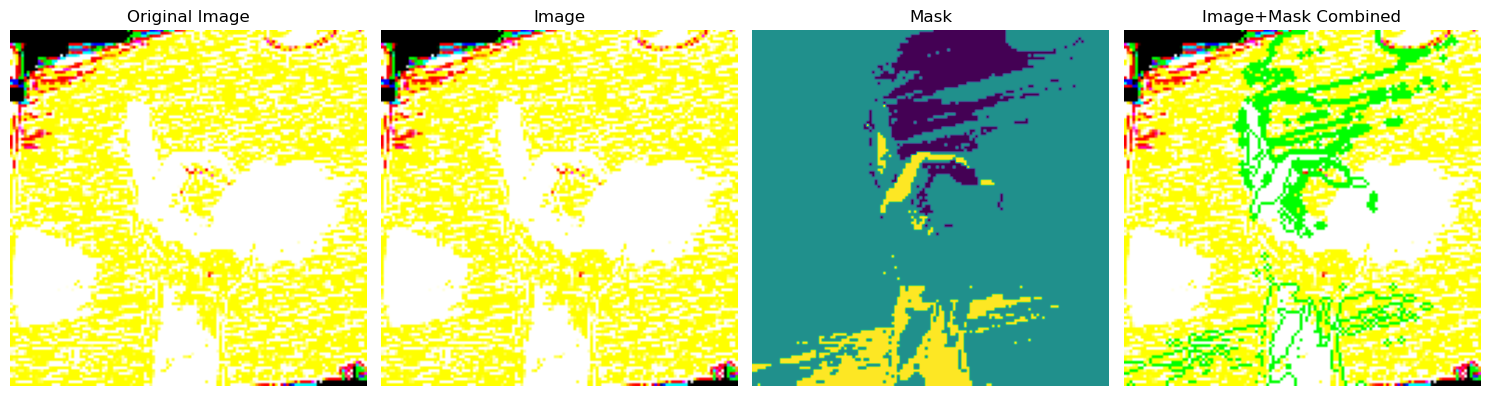

In [101]:
plot_comparison(X_test[i], temp, mask)

### Explaining an Incorrect Prediction